1. 필요 모듈 불러오기

In [ ]:
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
                                    
import torch                        
import torch.nn as nn               
import torch.optim as optim         
import torch.nn.init as init        

2. 데이터셋 불러오기

In [ ]:
x_train = torch.linspace(0, 100, steps=20).reshape(-1, 1)
y_train = 3 * x_train + 10 + torch.randn(x_train.size()) * 5  # y = 3x + 10 + 노이즈

3. 모델 정의

In [ ]:
class LinearRegressionModel(nn.Module):        
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Wx + b
        init.constant_(self.linear.weight, 1.0)  # 가중치를 0.5로 초기화
        init.constant_(self.linear.bias, 1.0)    # 편향을 1.0으로 초기화

    def forward(self, x):
        return self.linear(x) # Wx + b를 계산

In [199]:
model = LinearRegressionModel()

4. 손실함수 정의
5. 최적화 방법 정의

In [ ]:
criterion = nn.MSELoss()  # Cost Function 
optimizer = optim.SGD(model.parameters(), lr=0.0001) # lr(하습률) = 0.0001

6. 학습 과정

In [ ]:
epochs = 100  #학습 횟수
for epoch in range(epochs):
    # 순전파
    predictions = model(x_train)  # ŷ = Wx + b
    loss = criterion(predictions, y_train)  # 손실계산
    
    # 역전파
    optimizer.zero_grad()  # Clear the gradients
    loss.backward()  # ∂costF/∂W, ∂costF/∂b 계산
    optimizer.step()  # W, b값 업데이트 W = W - η * ∂costF/∂W, b =  b - η * ∂costF/∂b

In [203]:
W = model.linear.weight.item()
b = model.linear.bias.item()
print(f"최종 W 값: {W}")
print(f"최종 b 값: {b}")

최종 W 값: 3.135556936264038
최종 b 값: 1.090395450592041


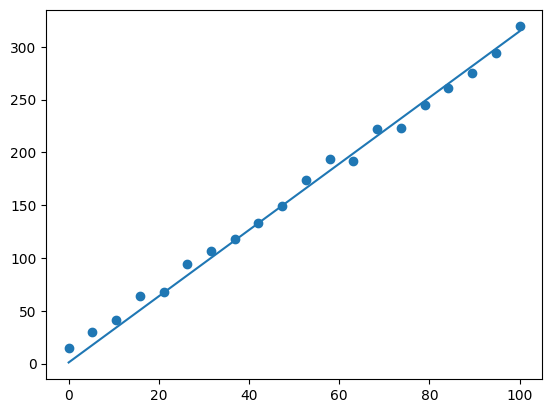

In [209]:
plt.figure()
plt.scatter(x_train, y_train, label='Data Points')
plt.plot([0,100], [W*0 + b, W*100 + b])
plt.show()